<a href="https://colab.research.google.com/github/JMacioce/AI-Profit-Increasing-System/blob/main/Profit_Increasing_AI_System_for_Company_with_10_million_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Business Problem**
* A company with 10 million customers would like to earn additional profits by launching a new product upgrade program
* The company's marketing team has created 7 different advertising campaigns (each offers customers specific features, promotions, or discounts to try to convince them to upgrade)
* The company knows how much profit it will make per sale for each advertising campaign, but it does not know how effective each campaign will be *(just as in the real world, the company would not know what choice is more effective because that is impossible and would require omniscience)*
* **My Goal**: to produce an **Artificial Intelligence system** that can **maximize the company's profits** for it's product upgrade program. 
  * I will do so by comparing the profits of my Thomspon Sampling approach to the Uniform Sampling approach
  * I will show my approaches absolute and relative improvement compared to the Uniform Sampling approach
  * This will depict that my AI agent learns while doing, by learning to choose the best overall advertising campaign for each customer while simultaneously being involved in the process of doing that very action

# **Reinforcement Learning** is one of the three primary **Machine Learning** paradigms
Along with **Supervised Learning** and **Unsupervised Learning**
* Supervised Learning: a machine uses matched pairs of input and output values in order to try to learn a general function for predicting the outputs based on the inputs
* Unsupervised Learning: a machine attempts to discover previously unknown patterns in a data set without the benefit of any prior knowledge about the data

# What is **Reinforcement Learning** though?
* Goal - to train a machine to understand its environment so it can take actions that will maximize it's cumulative rewards
* Strategy - to find a balance for the machine between exploring the environment and exploiting what we have already learned

# All Reinforcement Learning systems are based on five principles:
* **Input and Output System**: artificial intelligence and cognitive computing systems are based on the notion of converting inputs into outputs
* **Rewards**: a metric that tells the system how well it is performing - there are different types of reward functions [ex. maximizing gains, minimizing losses]
* **Environment**: it defines the "rules of the game" and is the source of information about states and rewards
* **Markov Decision Processes**: provides a framework for modeling decision making when outcomes are partly random and partly under the control of a decision maker - they also involve discrete units of time where a "unit of time" can be many things [ex. one second, one turn in a game]
* **Training and Inference**: each reinforcement learning system goes through two phases in it's life cycle 
  * **Training Mode**: the system is learning and is attempting to identify an optimal policy to guide it's choices and actions 
  * **Inference Mode**: the system has been fully trained, and is deployed to perform it's task

# What is **Thompson Sampling**?
* Allows us to ***identify which option to pursue in order to maximize our expected rewards***
* It also ***aligns with all our core elements of reinforcement learning***
  * **input and output systems**
  * **rewards**
  * an **environment**
  * **Markov decision processes**
  * **training** and **inference**

* The environment consists of a set of options which may provide a reward according to some unknown probability
* During each round or turn, we choose one option and record whether we received a reward or not

# How I use Thomspon Sampling for this Project
Choosing which option to pursue for the current round:
  * First - For each available option, we take a random draw from a beta distribution whose shape is defined by
    * How many times we previously received a reward after choosing that option
    * And, How many times we did not previously receive a reward after choosing that option
  * Second - Then we pursue whichever option has the highest beta value

As time passes, our AI system learns more and more about the varying levels of reward that each option provides, and it will quickly identify the best option to pursue in order to maximize cumulative rewards

# **Beta Distribution**
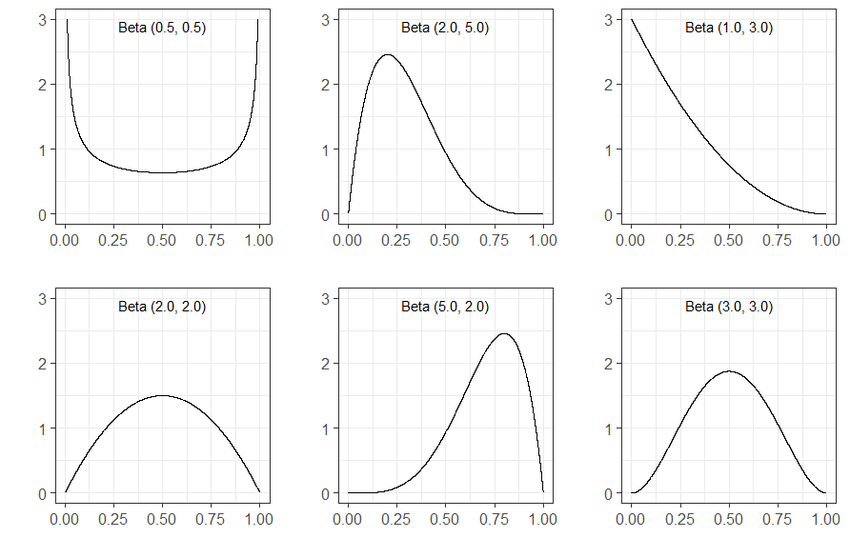

What you see above are examples of a beta distribution.

The beta distribution is a probability distribution, which means that the shape of this curve tells us something about how likely it is that something will happen.

Notice that the set of possible beta values ranges from 0.0 to 1.0 along the x-axis. What each curve is telling us, then, is how likely we would be to get any specific value between zero and one if we were to choose a value from this distribution at random.

The beta distribution in the bottom right tells us that, because of the shape of it's curve, that if we were to draw a number at random, we would be much more likely to get a number close to 0.5, then to get a number close to 0.25 or 0.75. It is certainly possible to still get a number of 0.25 or 0.75, but the chances are much smaller than the chance of getting a number close to 0.5.

Notice how every beta distribution has two parameters? These are called the shape parameters because these values control the shape of the curve. If the value of one of these parameters is small, and the other is large, then the distribution will have a right skew or left skew (as seen in the middle two beta distributions).

# How do we connect **beta distribution** to **Thompson Sampling**?
For any option that we are considering when we're using Thompson Sampling: 
  * We make the value of the **first shape parameter** represent the **number of times that we previously received a reward** when we chose that option. 
  * And we make the value of the **second shape parameter** represent the **number of times that we previously did not receive a reward** when we chose that option.

In short, any option in Thomspon sampling, the first shape parameter is the number of past **Sales** with our campaign possibilities, and the second shape parameter is the number of past **Non Sales** with our campaign possibilities.

An option with a past history of providing us with a comparatively high proportion of Sales will have a beta distribution that is likelier to give us a larger beta value if we drew a value at random from the distribution.
Opposingly, for an option with a past history of providing us with a comparatively high proportion of Non Sales will have a beta distribution that is lieklier to give us a smaller beta value.

### When comparing possible options
If we compare the two middle column beta distributions in the diagram above, if we were to draw one random value from each distribution, then the value that we get from the beta distribution in the middle column on the bottom row is likely to be substantially larger than the value that we get from the beta distribution in the middle column on the top row.

If this happens in Thompson Sampling, then we would choose to pursue the option with the middle column bottom row for our current turn, because it gave us the largest beta value.

***This is how our Artificial Intelligence uses Thompson Sampling to exploit what it has learned in the past to maximize cumulative rewards.***

Note that there may be overlap between the areas of our distributions. This means that if we draw one random value from each distribution, there is a small chance that the value from the distribution with more Non Sales may actually be larger than the value from the distribution with more Sales. And in that case, we would choose to pursue the option associated with the distribution with more Non Sales for our current turn, because although it was unlikely, that option happened to give us the largest beta value.

***This is how our Artificial Intelligence uses Thompson Sampling to continue to explore options over time, even if one option seems to be inferior to another option.***

This is important because, by random chance, the best option may have delivered many more losses than one might expect at the beginning of the process. It is an unlikely scenario, but it could happen.

***In the case of Reinforcement Learning, if we did not have some mechanisms of occasionally retrying options that appear to be inferior, then we could never really be confident that we have identified the best option.***

Thomspon Sampling uses this beta distribution approach in order to find an optimal balance between exploitation and exploration, and it applies nicely for our Artificial Intelligence system that calculates the best campaign possibilities.

In [ ]:
#import the required Python libraries
import numpy as np #used to generate random values from a few different probability distributions
import locale #used to properly format currency values

#set locale to format currency values into US dollars
locale.setlocale(locale.LC_ALL, 'en_US.utf8')

#to ensure that results are reproducible - we define a seed for the random number generator
np.random.seed(107)

#class to hold details of each advertising option
class AdvertisingOption():
  #initialize the advertising option
  def __init__(self, campaignId):
    self.id = campaignId
    #assign a random conversion rate between 1% and 20% for this campaign
    #conversion rate indicates the percentage of customers that will choose to upgrade their smartphones if they are exposed to a particular advertising campaign
    self.conversionRate = np.random.uniform(0.01, 0.2)
    #assign a random amount of profit per successful sale for this campaign
    #although we are assigning the profit per sale values randomnly of between $100 and $200, we could just as easily use specific values provided by the company for each advertising campaign
    #the company will know the cost and sales price of their product, as well as the per sale cose associated with each campaign's features, promotions, and discounts
    #therefore we can easily calculate the profit per unit sold for each advertising campaign for any specific company!
    self.avgProfitPerSale = np.random.uniform(100., 200.)
    #tracking the number of successes and failures of our sales history
    self.saleSuccess = 0
    self.saleFailure = 0
  
  #returns total number of times a campaign has been tried
  def totalTrials(self):
    return self.saleSuccess + self.saleFailure
  
  #returns total profit thus far generated by a campaign
  def totalProfit(self):
    return self.saleSuccess * self.avgProfitPerSale

  #returns the actual amount of profit per trial
  def actualProfitPerTrial(self):
    if self.totalTrials() > 0:
      return self.totalProfit() / self.totalTrials()
    else:
      return 0

  #returns the theoretical amount of profit per trial
  #A COMPANY WOULD NEVER KNOW THIS INFORMATION, AND OUR AI SYSTEM WILL NEVER GET TO SEE OR USE THIS INFORMATION
  #THIS INFORMATION IS ONLY INCLUDED TO SHOW WHAT THE RESULTS SHOULD IDEALLY LOOK LIKE IF OUR AI AGENT IS PERFORMING WELL
  def expectedProfitPerTrial(self):
    return self.conversionRate * self.avgProfitPerSale


#function that tries an advertising campaign on a customer
#once our AI system has decided which particular campaign to show to a particular customer, it will call this function
##the function will then determine if a sale occurred or not by checking a random number between 0 and 1 is less than or equal to the campaigns conversion rate
#if it is, the customer bought the product upgrade. If not, then no sale occurred
def tryAdvertisingCampaign(campaign):
  if np.random.random() <= campaign.conversionRate:
    campaign.saleSuccess += 1
  else:
    campaign.saleFailure += 1


##### INITIALIZE THE CHARACATERISTICS OF OUR ENVIRONMENT #####

#number of advertising campaigns
numAdvertisingCampaigns = 7

#number of customers
numCustomers = 10000000

#list to keep track of all our advertising campaign objects in one place
campaigns = []

#create all the advertising campaigns
#THIS IS ONLY FOR OUR PURPOSES TO DETERMINE IF OUR AI BEHAVES OPTIMALLY, THE MULTI-MILLION CUSTOMER COMPANY AND OUR AI AGENT WILL NOT HAVE THE INFORMATION OF THE THEORETICAL AMOUNT OF PROFIT PER TRIAL
for c in range(numAdvertisingCampaigns):
  campaigns.append(AdvertisingOption(c))
  #print the expected profit per trial for the newly created campaign
  print('Advertising Campaign # {0} - Expected profit per trial = {1}'.format(campaigns[c].id + 1, locale.currency(campaigns[c].expectedProfitPerTrial(), grouping=True)))

Advertising Campaign # 1 - Expected profit per trial = $7.18
Advertising Campaign # 2 - Expected profit per trial = $14.34
Advertising Campaign # 3 - Expected profit per trial = $8.63
Advertising Campaign # 4 - Expected profit per trial = $7.87
Advertising Campaign # 5 - Expected profit per trial = $9.14
Advertising Campaign # 6 - Expected profit per trial = $33.10
Advertising Campaign # 7 - Expected profit per trial = $17.58


### From our findings, we can see that Campaign 6 is expected to generate the most profit per trial.

### Followed by Campaign 7 and Campaign 2 respectfully.

***If our AI agent is effective in learning about its environment, it will choose to show Campaign 6 to customers much more frequently than any other campaign with a view towards maximizing profits***

Remember that the AI agent does not have access to the expected profit data listed above, instead, it will need to try to discover this information on it's own by taking actions and learning from what happens as a result of those actions

In [ ]:
##### CREATING OUR SIMULATION #####
#we use nested for loops with the outer loop running once for each of the company's customers, and the inner loop running once for each of the 7 advertising campaigns

#Strategy for the simulation:
#First the AI agent will consider what it has learned about the various advertising campaigns and will decide which campaign to show to the current customer
#Then, it will try the chosen campaign on the current customer and will record whether or not the customer purchased a product upgrade
#The AI agent will then use this information in the next round to help it decide which advertising campaign to show to the next customer
#The process continues until each of the company's 10 million customers have been subjected to one of the 7 advertising campaigns


#for each customer
for customer in range(numCustomers):
  #variables tracking the best beta value and campaign to try for this customer
  IndexOfCampaignToTry = -1
  bestBetaValue = -1

  #for each advertising campaign
  for campaign in campaigns:
    #using Thompson Sampling approach to draw a random value from a beta distribution whose shape shape is defined by the actual profit per trial that the AI agent has thus far observed for the current campaign
    #notice that the value of the second shape parameter is set to the number of campaign options divided by two
    #that is because, in this scenario, we are interest in maximizing overall profits, rather than simply maximizing the overall number of successful sales or wins (as was the case in the above beta distribution description)
    #to have a value of the second shape parameter that is some fraction of the total number of options from which the AI agent must select often works well in helping the agent to learn
    currentCampaignBetaValue = np.random.beta(campaign.actualProfitPerTrial() + 1., numAdvertisingCampaigns / 2.)
    
    #check whether the beta value is the largest thus far observed for this customer
    if currentCampaignBetaValue > bestBetaValue:
      #update best beta value
      bestBetaValue = currentCampaignBetaValue
      #update index of campaign to try for this customer
      #after we have checked the beta values for all advertising campaigns for this customer, an index of the campaign with the largest beta value will be stored in the IndexOfCampaignToTry variable
      IndexOfCampaignToTry = campaign.id
  
  #AI agent trying to show chosen advertising campaign to current customer and will record whether the campaign was successful (ex. whether product upgrade was purchased or not)
  tryAdvertisingCampaign(campaigns[IndexOfCampaignToTry])

#process is repeated for the next customer and until the Ai agent has chosen a campaign for all 10 million of the Company's customers

#total profits for the Thompson Sampling and Uniform Sampling methods
#to depict how well our Thomspon Sampling approach works, we will compare it's performance against a Uniform Sampling approach
#Uniform Sampling is when we simply show each of the 7 advertising campaigns to an equal number of the company's customers
totalProfitThompsonSampling = 0
totalProfitUniformSampling = 0

#compute number of customers that would see each advertising campaign if we use a uniform sampling approach
uniformSamplingCustomersPerCampaign = numCustomers / numAdvertisingCampaigns

#using for loop to iterate through the advertising campaign objects and print the average profits per trial and total number of trials for each campaign
#this will give us an insight into which advertising campaigns the AI agent chose to show to the company's customers
#for convenience, we are also using the same for loop to compute the running profit totals for the Thompson Sampling and Uniform Sampling methods
for campaign in campaigns:
  print('Advertising Campaign # {0} - Actual profit per trial = {1}, Total trials = {2}'.format(campaign.id + 1, 
                                                                                 locale.currency(campaign.actualProfitPerTrial(), grouping=True), 
                                                                                 campaign.totalTrials()))
  totalProfitThompsonSampling += campaign.totalProfit()
  totalProfitUniformSampling += (uniformSamplingCustomersPerCampaign * campaign.conversionRate * campaign.avgProfitPerSale)

#display overall results
print('\nThompson Sampling Total Profit: {0}'.format(locale.currency(totalProfitThompsonSampling, grouping=True)))
print('Uniform Sampling Total Profit: {0}'.format(locale.currency(totalProfitUniformSampling, grouping=True)))
print('\nThompson Sampling Absolute Improvement: {0}'.format(locale.currency(totalProfitThompsonSampling - totalProfitUniformSampling, grouping=True)))
print('Thompson Sampling Relative Improvement: {0:.2%}'.format((totalProfitThompsonSampling / totalProfitUniformSampling) - 1.))

#Since our AI agent needs to make decisions for 10 million different customers, this code will take a few minutes to run.

Advertising Campaign # 1 - Actual profit per trial = $7.10, Total trials = 240413
Advertising Campaign # 2 - Actual profit per trial = $14.31, Total trials = 1086116
Advertising Campaign # 3 - Actual profit per trial = $8.57, Total trials = 363189
Advertising Campaign # 4 - Actual profit per trial = $7.94, Total trials = 317492
Advertising Campaign # 5 - Actual profit per trial = $9.16, Total trials = 420779
Advertising Campaign # 6 - Actual profit per trial = $33.06, Total trials = 5900042
Advertising Campaign # 7 - Actual profit per trial = $17.56, Total trials = 1671969

Thompson Sampling Total Profit: $251,183,610.20
Uniform Sampling Total Profit: $139,768,723.22

Thompson Sampling Absolute Improvement: $111,414,886.98
Thompson Sampling Relative Improvement: 79.71%
